In [1]:
from PIL import Image, ImageOps
from skimage.metrics import mean_squared_error, structural_similarity
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
def mse_error(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [5]:
conventional_dir = "results/fecg_p2p/spectrogram_conventional/"

files = os.listdir(conventional_dir)
file_paths_conventional = {}
for file in files:
    segment_id = file.split('_')[-1][:-4]
    file_path = os.path.join(conventional_dir, file)
    file_paths_conventional[segment_id] = file_path

### Comparison on every pair between our proposed method and conventional method

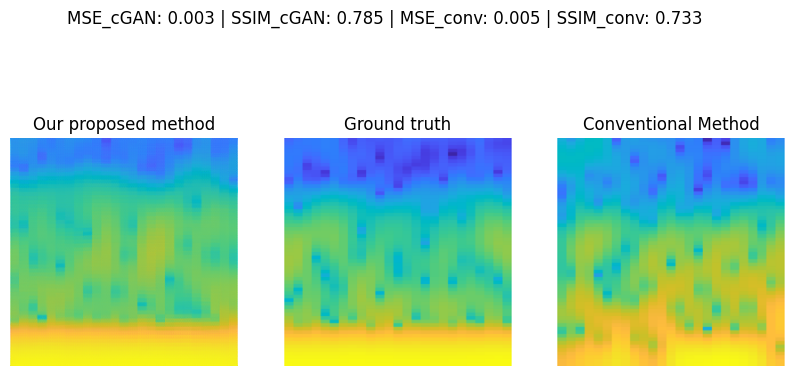

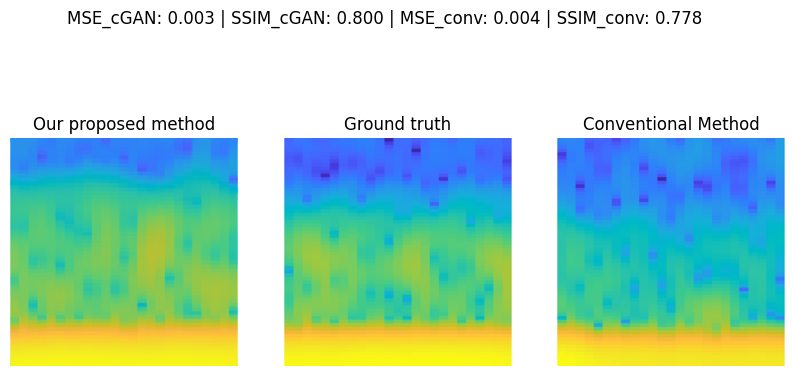

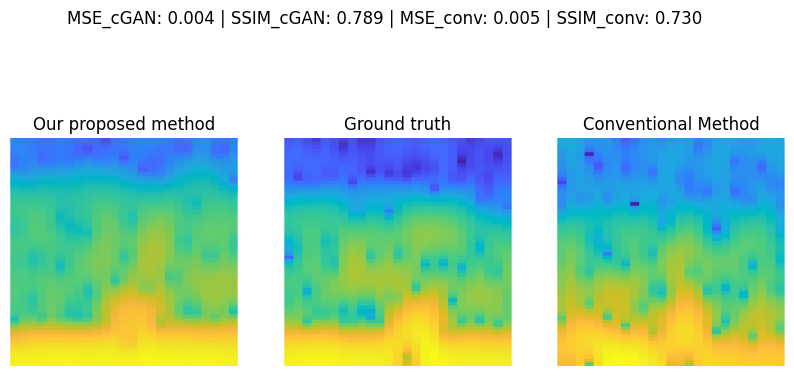

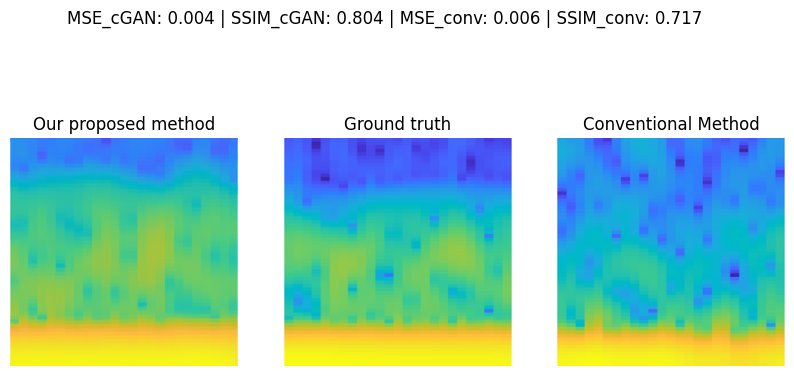

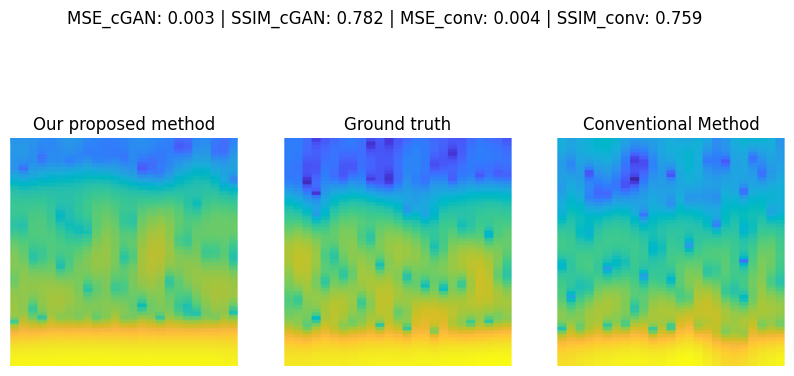

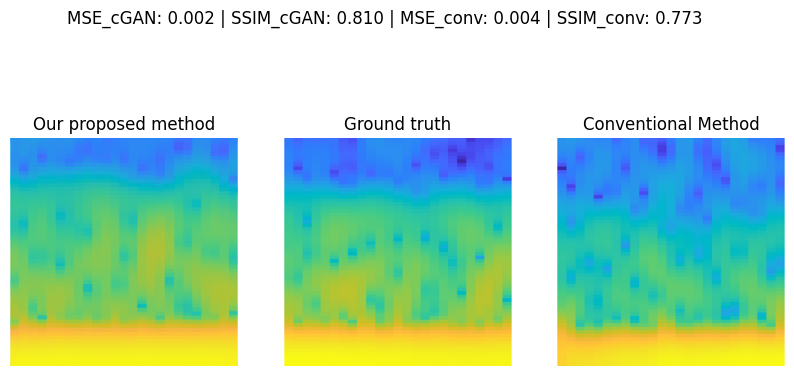

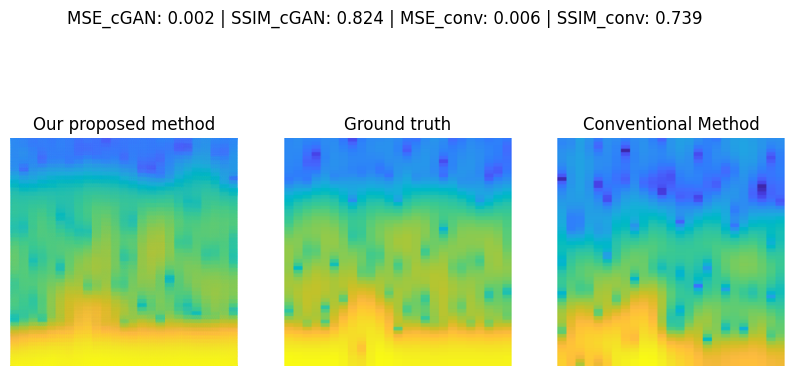

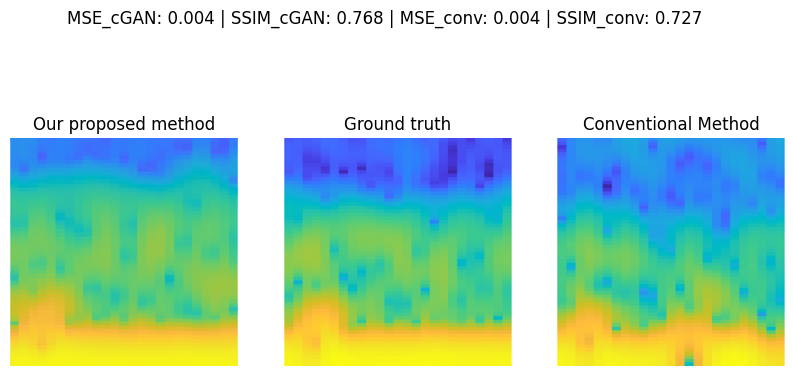

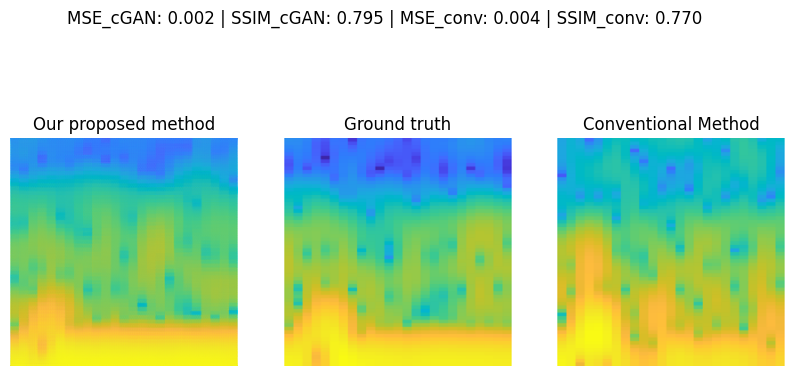

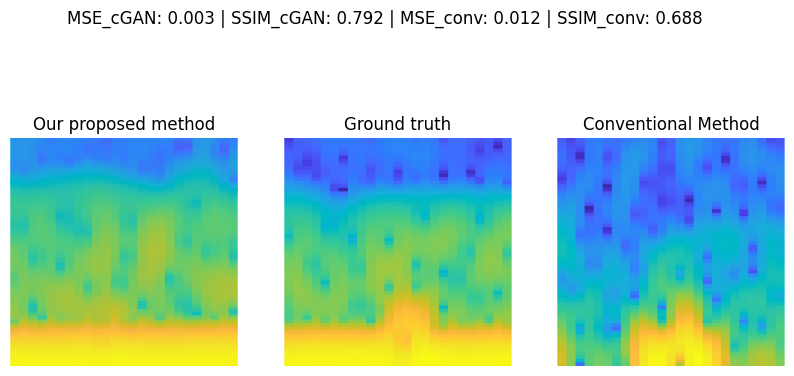

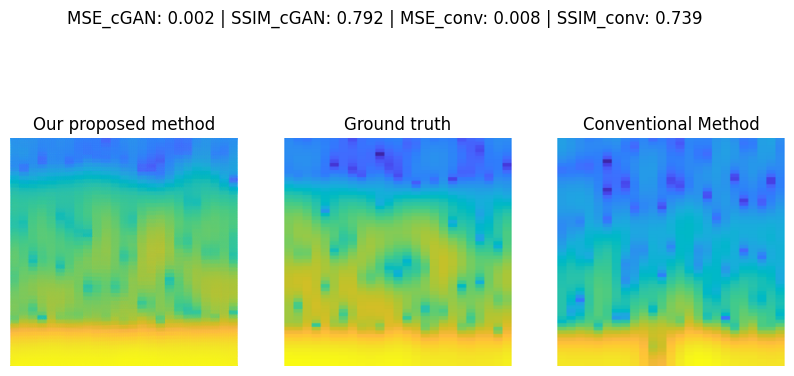

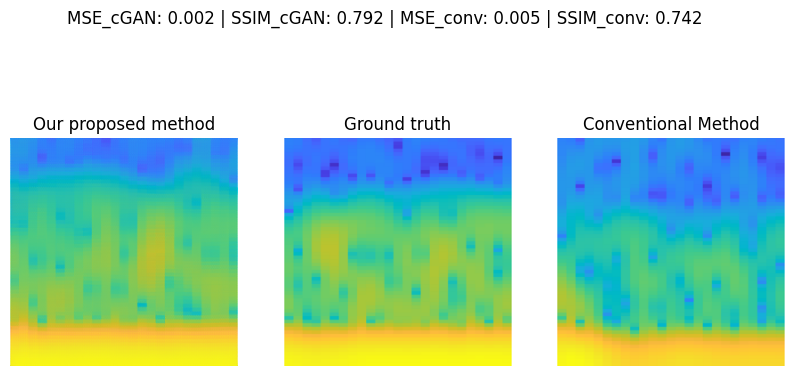

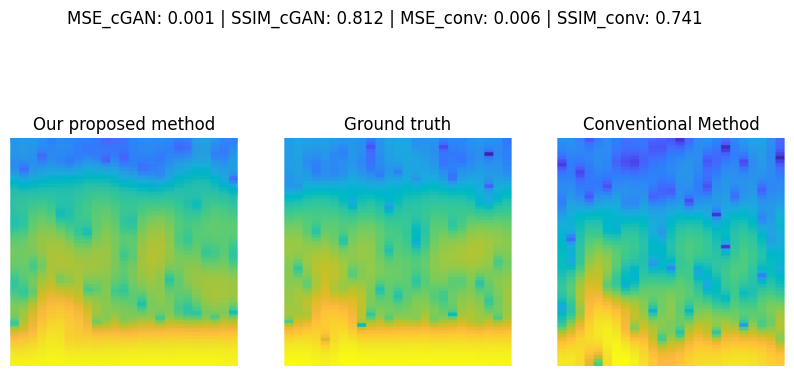

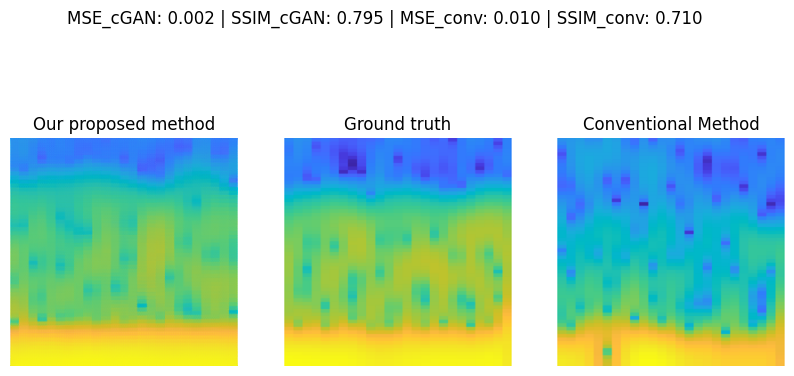

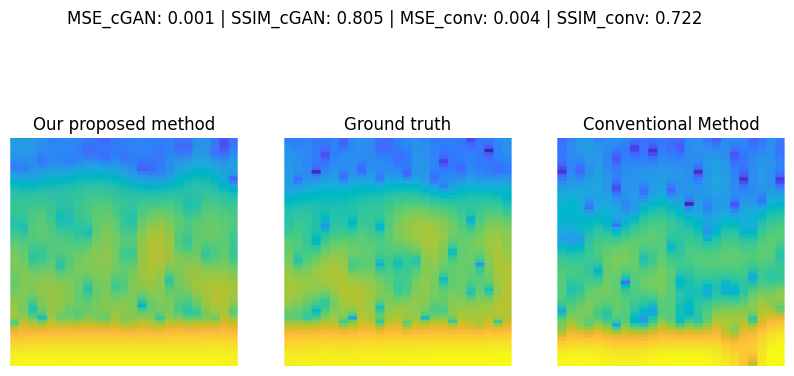

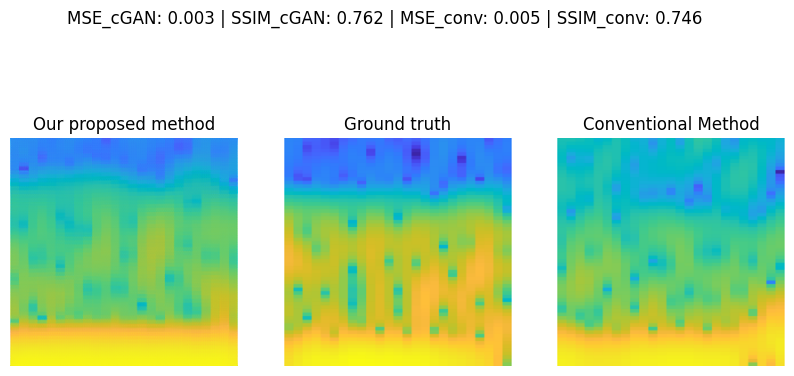

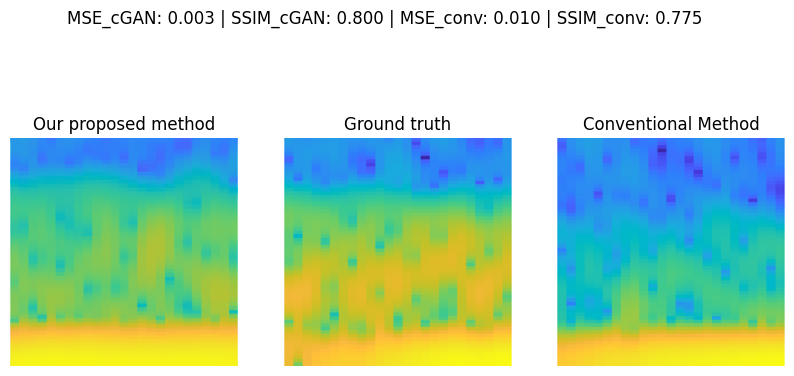

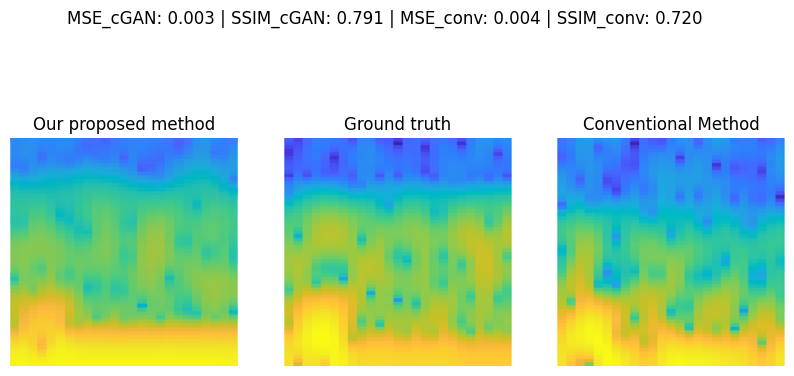

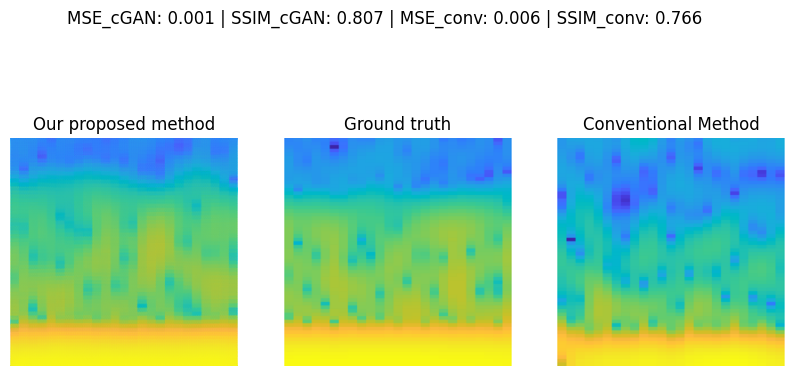

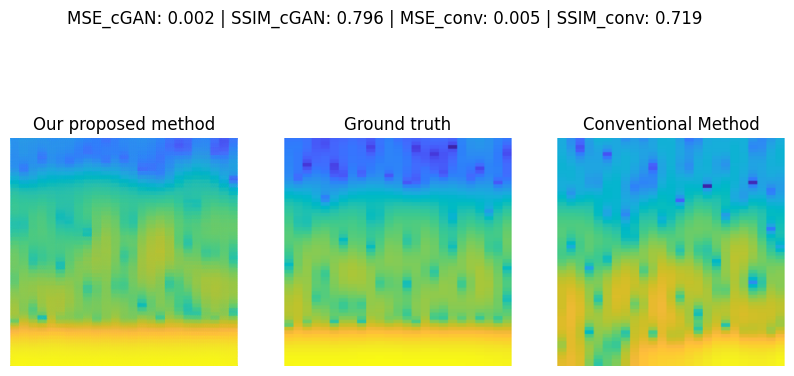

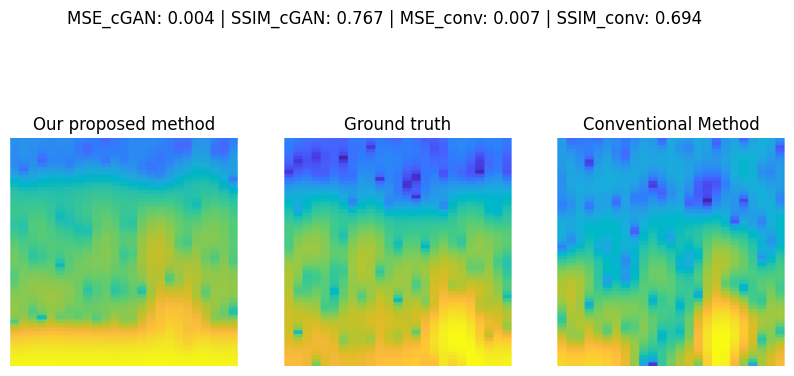

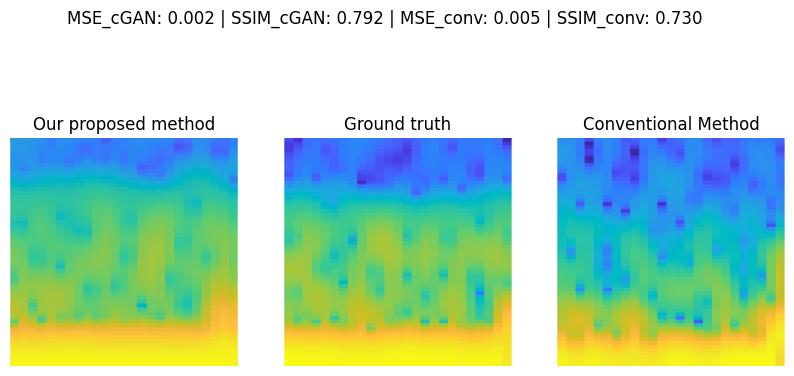

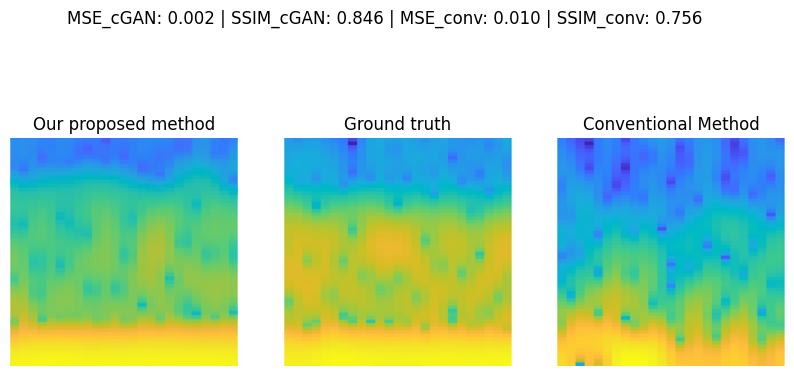

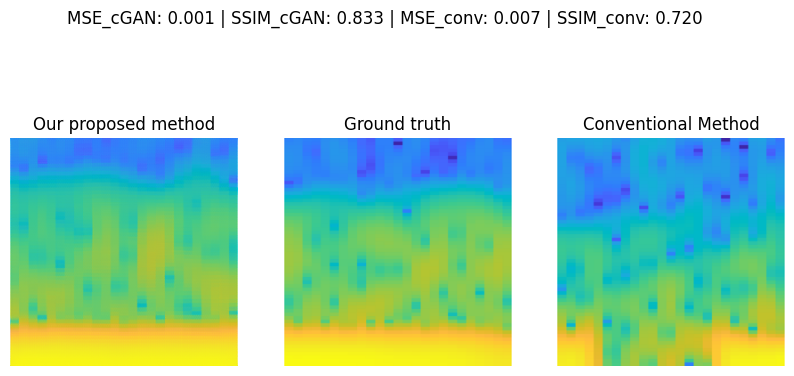

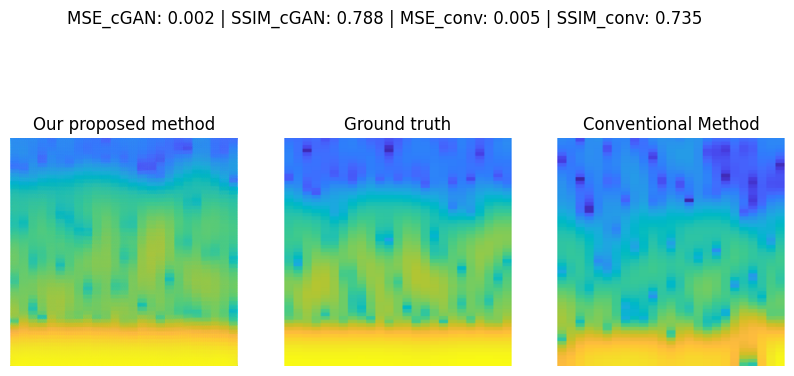

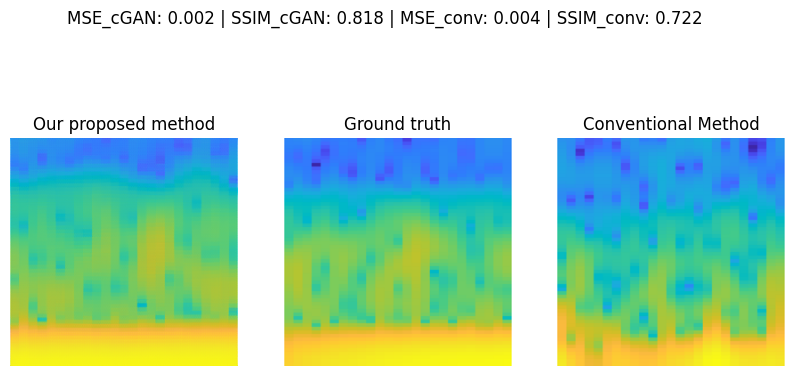

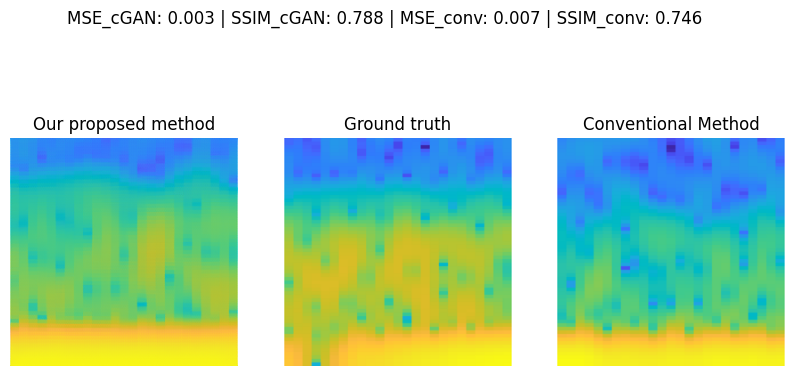

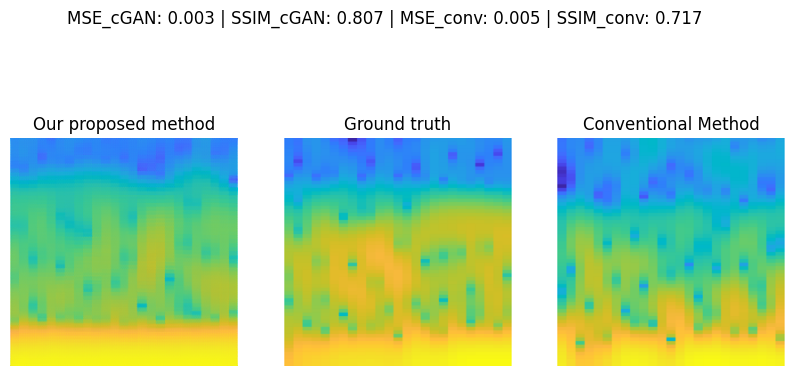

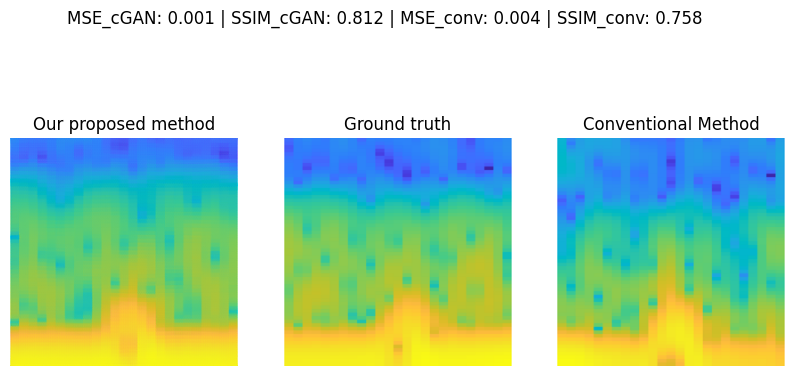

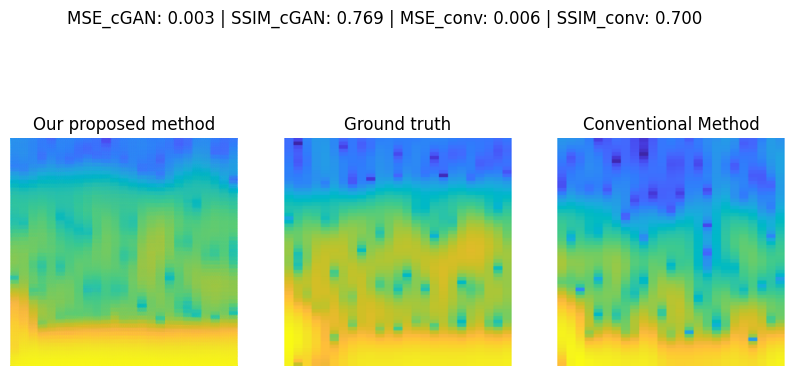

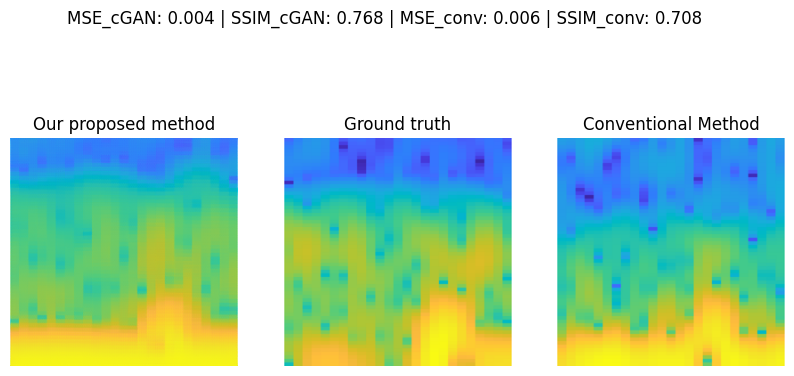

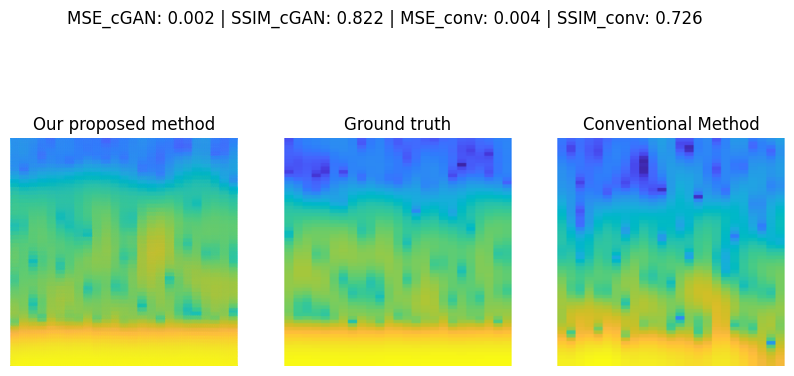

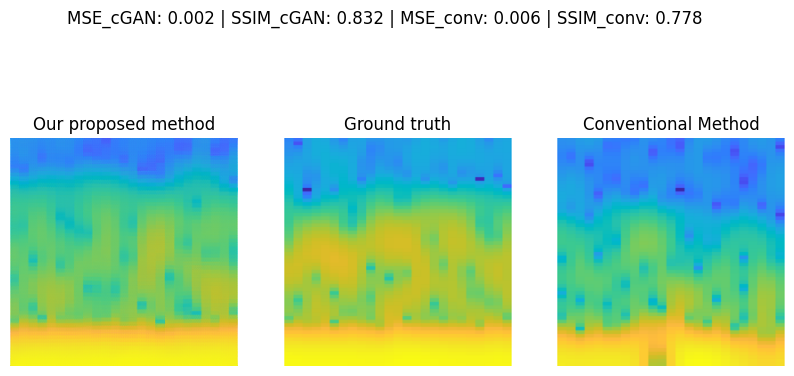

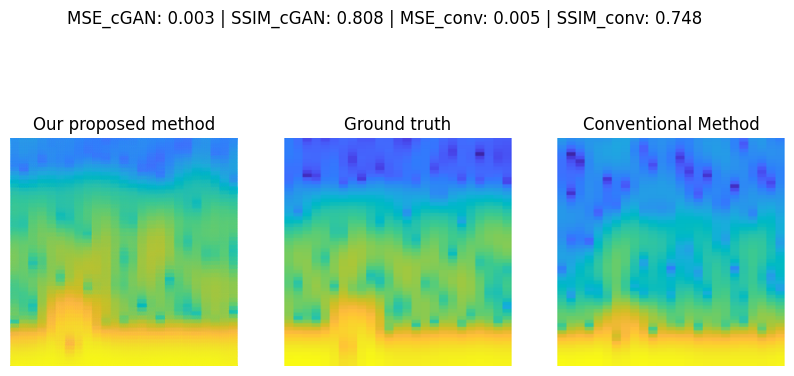

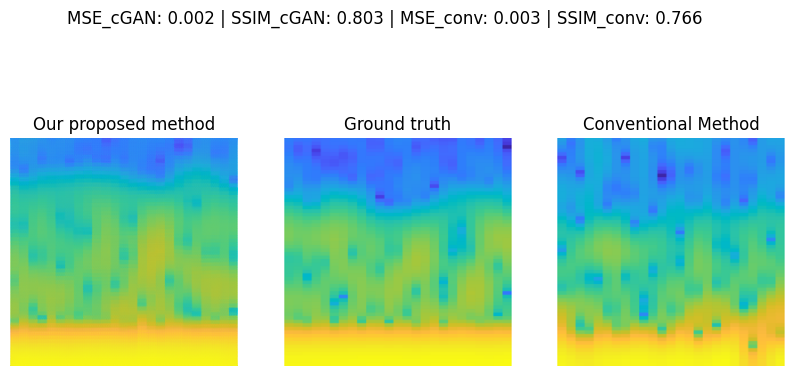

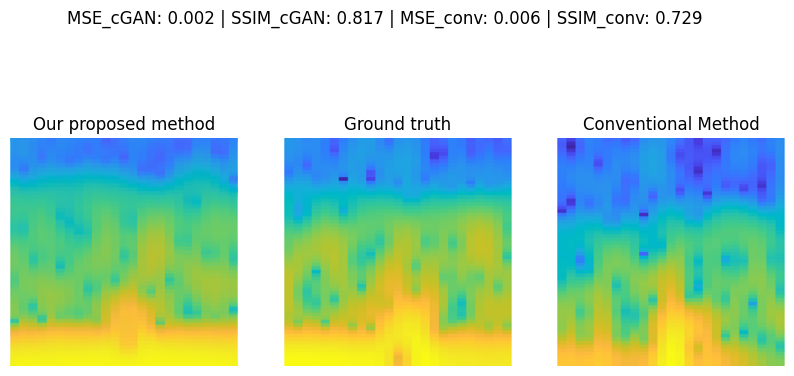

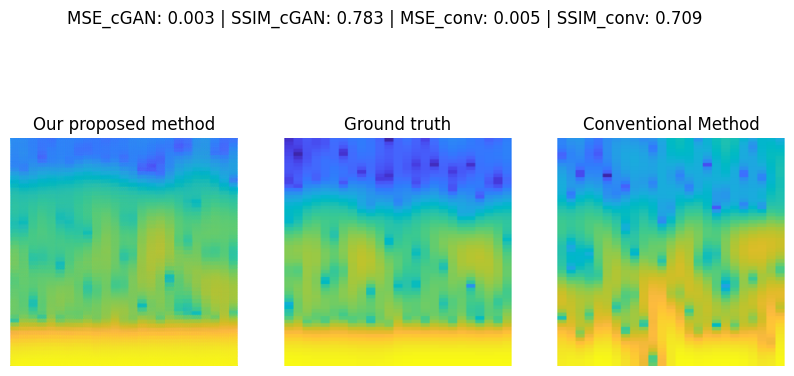

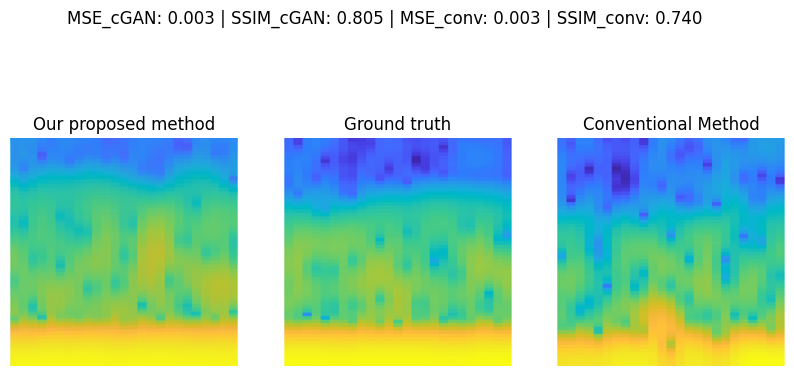

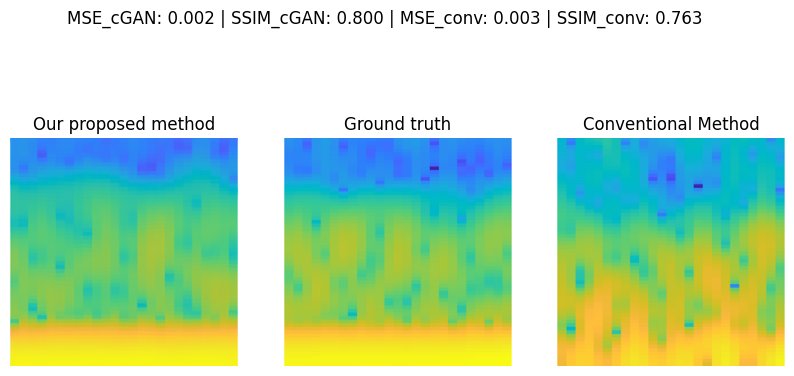

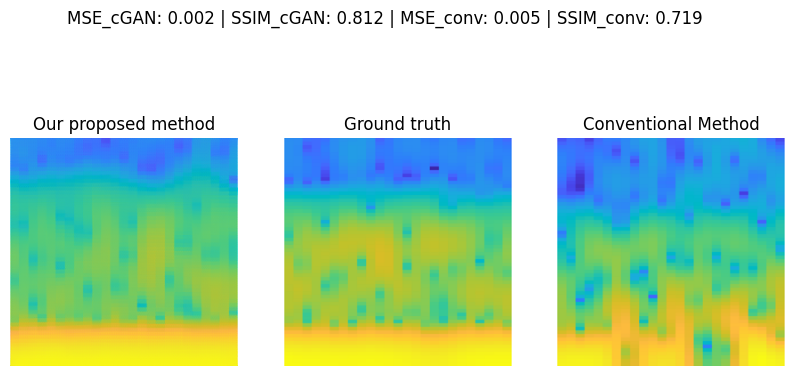

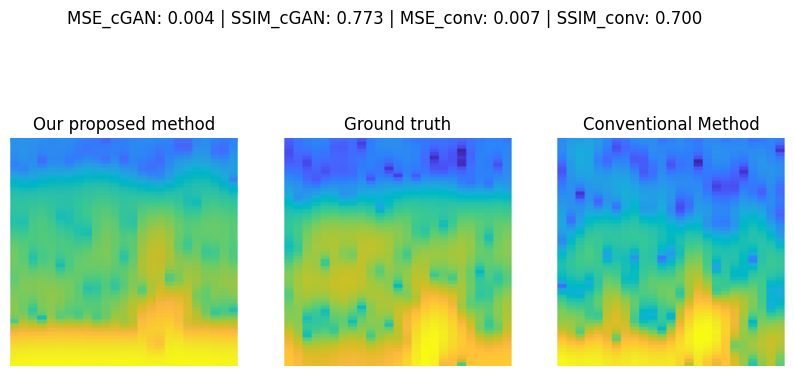

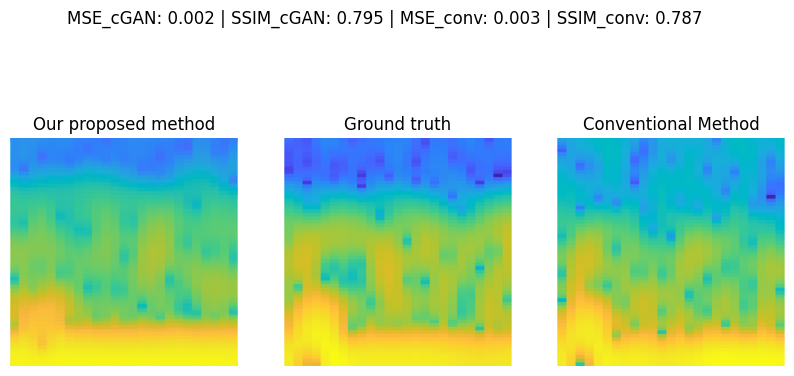

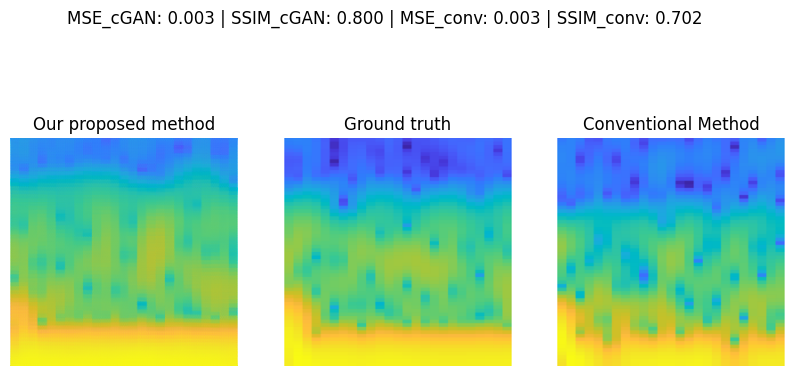

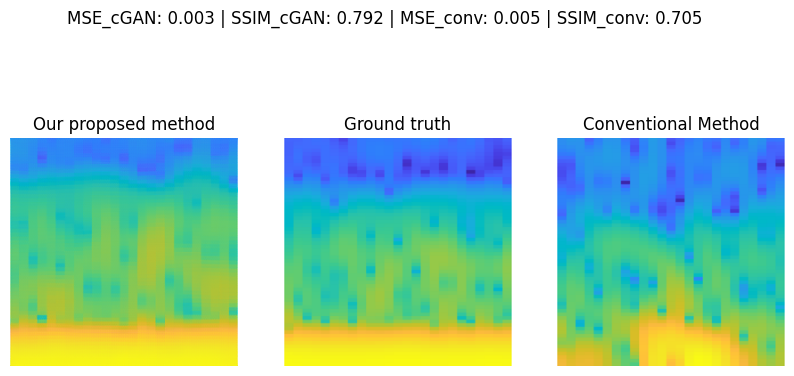

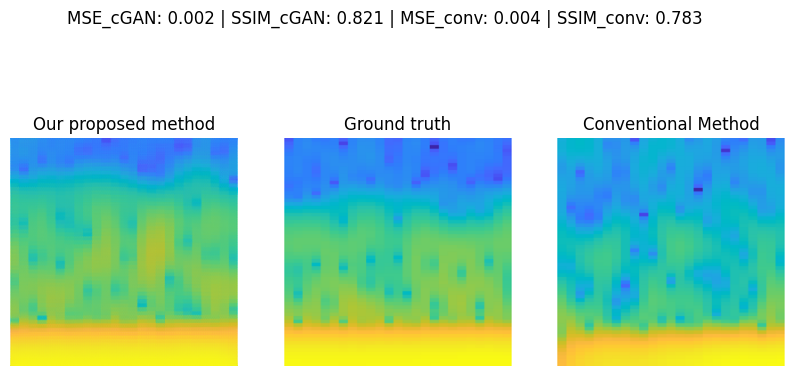

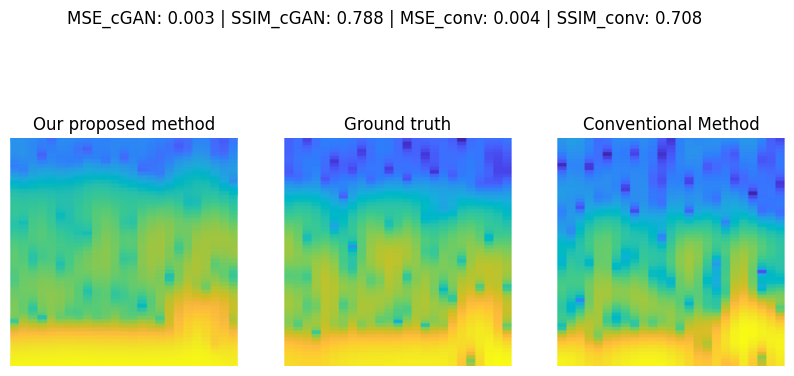

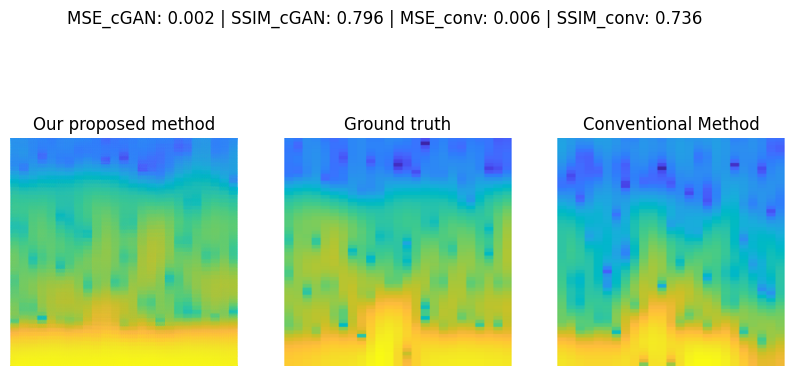

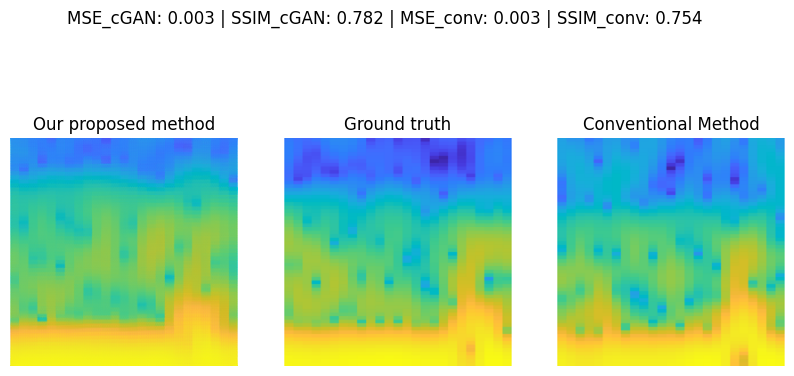

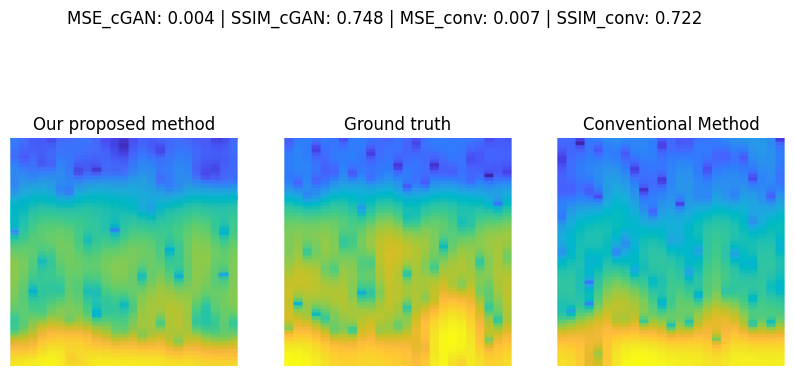

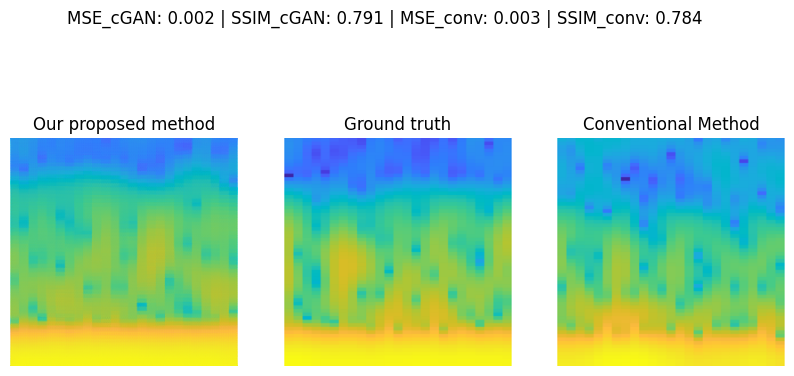

In [7]:
p2p_dir = "results/fecg_p2p/test_latest/images"

mses_conv = []
ssims_conv = []
mses_cgan = []
ssims_cgan = []
# Loop through all the images in the directory
for filename in os.listdir(p2p_dir):
    # Check if the file is a fake image
    if not filename.endswith('_fake_B.png'):
        continue
    
    segment_id = filename.split('_')[4]
    # Construct the corresponding real image filename
    real_filename = filename.replace('_fake_B.png', '_real_B.png')
    
    # Load the generated and ground truth images
    fake_path = os.path.join(p2p_dir, filename)
    real_path = os.path.join(p2p_dir, real_filename)
    conv_path = file_paths_conventional[segment_id]

    fake_img = Image.open(fake_path)
    real_img = Image.open(real_path)
    conv_img = Image.open(conv_path)
    conv_img = conv_img.resize((256, 256))

    fake_img_gray = ImageOps.grayscale(fake_img)
    real_img_gray = ImageOps.grayscale(real_img)
    conv_img_gray = ImageOps.grayscale(conv_img)

    # Calculate MSE and SSIM
    # Convert the images to NumPy arrays
    fake_arr = np.array(fake_img_gray)
    real_arr = np.array(real_img_gray)
    conv_arr = np.array(conv_img_gray)

    fake_arr_norm = np.array(fake_img_gray)/255.0
    real_arr_norm = np.array(real_img_gray)/255.0
    conv_arr_norm = np.array(conv_img_gray)/255.0

    mse_cgan = mse_error(fake_arr_norm, real_arr_norm)
    ssim_cgan = structural_similarity(fake_arr, real_arr, multichannel=True, win_size=11)
    mse_conv = mse_error(conv_arr_norm, real_arr_norm)
    ssim_conv = structural_similarity(conv_arr, real_arr, multichannel=True, win_size=11)

    mses_conv.append(mse_conv)
    ssims_conv.append(ssim_conv)
    mses_cgan.append(mse_cgan)
    ssims_cgan.append(ssim_cgan)

    fig, axs = plt.subplots(1, 3, figsize=(10, 5))
    axs[0].imshow(fake_img)
    axs[0].axis('off')
    axs[0].set_title('Our proposed method')
    axs[1].imshow(real_img)
    axs[1].axis('off')
    axs[1].set_title(f'Ground truth')
    axs[2].imshow(conv_img)
    axs[2].axis('off')
    axs[2].set_title(f'Conventional Method')
    plt.suptitle(f'MSE_cGAN: {mse_cgan:.3f} | SSIM_cGAN: {ssim_cgan:.3f} | MSE_conv: {mse_conv:.3f} | SSIM_conv: {ssim_conv:.3f}')
    
    plt.show()


### Boxlot for MSE and SSIM values produced by our propose method and Conventional method

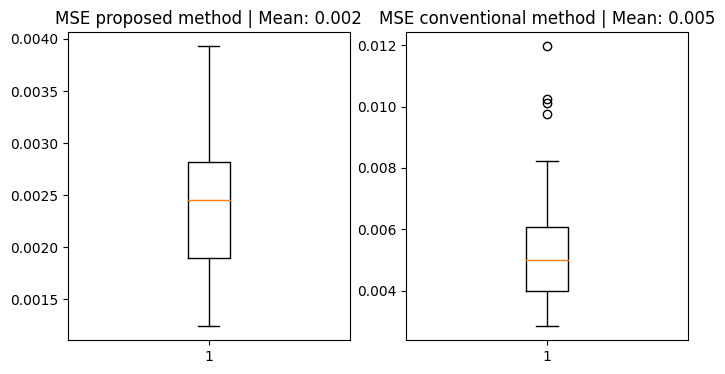

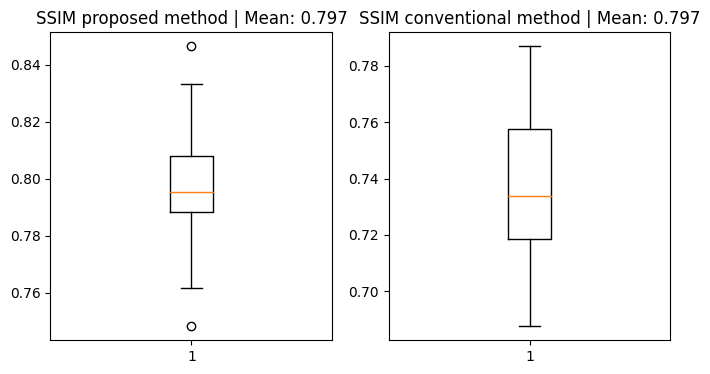

In [11]:

fig1, ax1 = plt.subplots(1, 2, figsize=(8, 4))
ax1[0].boxplot(mses_cgan)
ax1[0].set_title(f'MSE proposed method | Mean: {np.mean(mses_cgan):.3f}')
ax1[1].boxplot(mses_conv)
ax1[1].set_title(f'MSE conventional method | Mean: {np.mean(mses_conv):.3f}')

fig2, ax2 = plt.subplots(1, 2, figsize=(8, 4))
ax2[0].boxplot(ssims_cgan)
ax2[0].set_title(f'SSIM proposed method | Mean: {np.mean(ssims_cgan):.3f}')
ax2[1].boxplot(ssims_conv)
ax2[1].set_title(f'SSIM conventional method | Mean: {np.mean(ssims_cgan):.3f}')

# Show the plot
plt.show()
